In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
df = pd.read_csv("/content/MARUTI.NS.csv")

In [431]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,9749.000000,9789.000000,9629.799805,9651.900391,9150.262695,426354
1,2018-01-02,9699.000000,9718.599609,9525.000000,9554.049805,9057.500000,451227
2,2018-01-03,9597.000000,9598.000000,9402.000000,9416.599609,8927.193359,658281
3,2018-01-04,9450.000000,9488.000000,9367.200195,9386.250000,8898.421875,562919
4,2018-01-05,9458.000000,9532.000000,9412.549805,9433.849609,8943.547852,732512
...,...,...,...,...,...,...,...
1231,2022-12-26,8147.000000,8346.000000,8076.049805,8256.799805,8256.799805,315102
1232,2022-12-27,8298.950195,8315.000000,8230.799805,8305.450195,8305.450195,423308
1233,2022-12-28,8315.000000,8453.500000,8287.599609,8421.049805,8421.049805,538632
1234,2022-12-29,8370.000000,8449.000000,8333.000000,8435.799805,8435.799805,452134


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [433]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,7473.965017,7561.551388,7375.101157,7463.637538,7300.564796,8.911949e+05
std,1093.206526,1083.539932,1097.313424,1086.569710,1048.978367,5.519953e+05
min,4150.000000,4267.000000,4001.100098,4011.500000,3924.709961,3.005200e+04
25%,6858.000000,6939.224854,6775.162598,6846.550171,6723.879761,5.199990e+05
50%,7308.500000,7382.000000,7223.625000,7303.099853,7158.754394,7.367390e+05
75%,8466.212646,8565.337403,8372.500000,8472.050049,8244.791992,1.081938e+06
max,9853.000000,9929.000000,9725.000000,9832.450195,9527.599609,4.892962e+06


In [434]:
df.Data	= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

<ipython-input-434-9d7ec7e71958>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Data	= pd.to_datetime(df.Date)


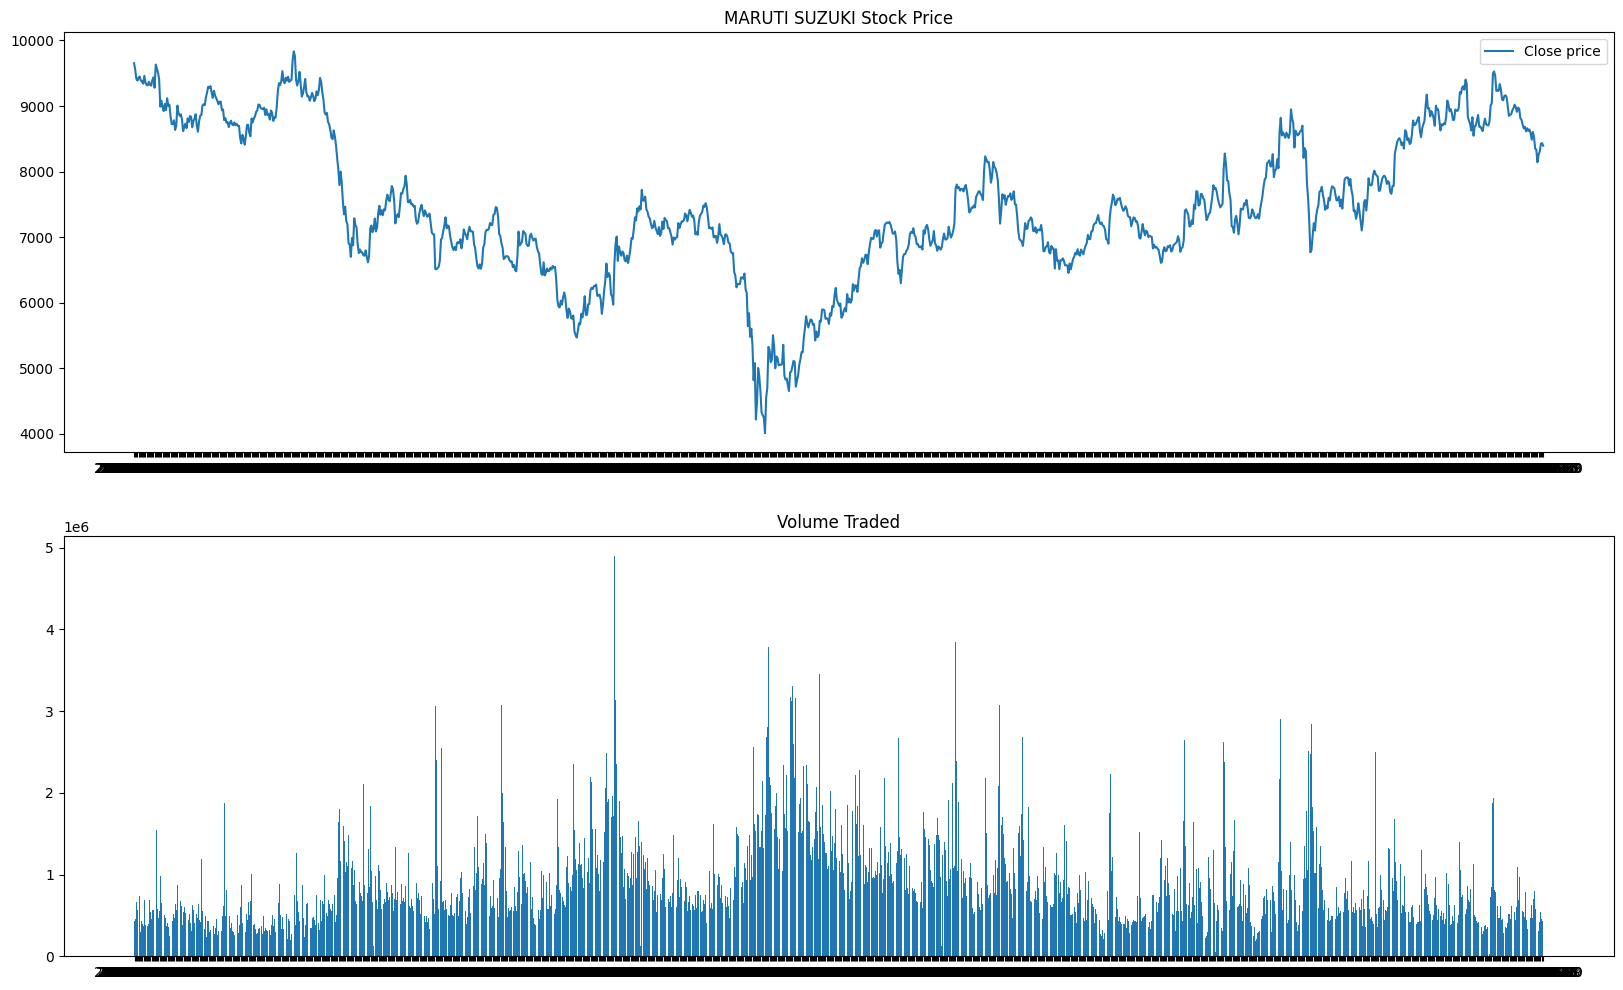

In [435]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('MARUTI SUZUKI Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [436]:
data = list(df2["Close"])

In [437]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -2.6025489596431814
2. P-Value :  0.0924715928860656
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 1235
5. Critical Values :
	 1% :  -3.4356560275160835
	 5% :  -2.8638831211270817
	 10% :  -2.568017509711682


In [438]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [439]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [440]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [441]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1136 100


In [442]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15676.891, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15669.361, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15670.988, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15670.996, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15667.429, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15672.991, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.856 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7832.715
Date:                Sat, 01 Apr 2023   AIC                          15667.429
Time:                        06:55:15   BIC                          15672.548
Sample:                             0   HQIC                         15669.355
    

In [443]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,2,0))

In [444]:
from statsmodels.tsa.arima.model import ARIMA
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -8006.518
Date:                Sat, 01 Apr 2023   AIC                          16019.036
Time:                        06:55:15   BIC                          16034.390
Sample:                             0   HQIC                         16024.812
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6478      0.020    -33.140      0.000      -0.686      -0.610
ar.L2         -0.3162      0.021    -14.961      0.000      -0.358      -0.275
sigma2      2.531e+04    702.698     36.017      0.000    2.39e+04    2.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.49   Jarque-Bera (JB):               268.91
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.17
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [445]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([8952.07851075, 8731.85654322, 8911.06888294, 8851.90730127,
       8802.18521424, 8623.62684913, 9052.10067928, 8988.15589971,
       9025.49560954, 8701.86112885, 8519.94367613, 8649.66014128,
       8681.12354449, 8770.91626429, 8720.57041384, 8879.22328162,
       9202.43788209, 9122.33388521, 8941.94971622, 8907.72853672,
       8844.08419766, 8737.63011619, 8738.8559323 , 8969.7769879 ,
       8974.51668628, 8969.13809915, 8975.34986278, 9308.30367294,
       9275.86655226, 9383.00760218, 9331.77658795, 9264.72477363,
       9444.83612645, 9357.1842781 , 8685.18530024, 8565.52655951,
       8529.09120395, 8554.01930648, 8851.0038633 , 8483.16828924,
       8712.10699502, 8666.07297704, 8855.42565878, 8920.92348215,
       8673.0598184 , 8654.70150562, 8580.9440043 , 8594.43153564,
       8738.89748541, 8861.88879219, 8749.74001468, 8700.43496497,
       8670.06455127, 8782.20011788, 9108.67654688, 9154.04704905,
       9739.2506443 , 9701.03717141, 9583.00890376, 9136.96775

In [446]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2022-08-05    8952.078511
2022-08-08    8731.856543
2022-08-10    8911.068883
2022-08-11    8851.907301
2022-08-12    8802.185214
                 ...     
2022-12-26    8013.385212
2022-12-27    8228.384133
2022-12-28    8299.826821
2022-12-29    8514.324125
2022-12-30    8494.709837
Length: 100, dtype: float64

<Axes: xlabel='Date'>

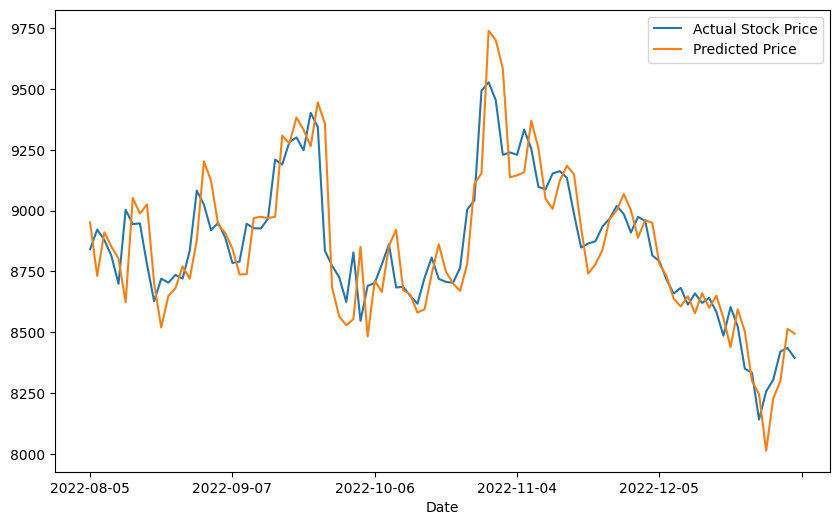

In [447]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

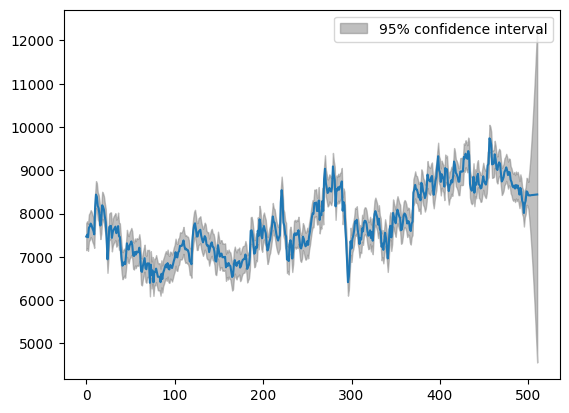

In [448]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [449]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

144.49394647465863

In [450]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.7265977023339465

# Predicting Future 10 values:

In [451]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([8494.70983696, 8421.53738074, 8422.02792068, 8418.10353183,
       8425.40284154, 8426.82743384, 8428.50839282, 8431.88108641,
       8434.0767746 , 8436.49995347, 8439.14797496, 8441.5783985 ,
       8444.07868148, 8446.60252131, 8449.08900838, 8451.59224357,
       8454.09644145, 8456.59471928, 8459.09652778, 8461.5979212 ,
       8464.09846698, 8466.59969314, 8469.10074659, 8471.60169677,
       8474.10276847, 8476.6037941 , 8479.10481114, 8481.60584832,
       8484.10687517, 8486.60790234, 8489.10893257])

In [452]:
import datetime
start_date = datetime.datetime(2022,12,30)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [453]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-30    8494.709837
2022-12-31    8421.537381
2023-01-01    8422.027921
2023-01-02    8418.103532
2023-01-03    8425.402842
2023-01-04    8426.827434
2023-01-05    8428.508393
2023-01-06    8431.881086
2023-01-07    8434.076775
2023-01-08    8436.499953
2023-01-09    8439.147975
2023-01-10    8441.578398
2023-01-11    8444.078681
2023-01-12    8446.602521
2023-01-13    8449.089008
2023-01-14    8451.592244
2023-01-15    8454.096441
2023-01-16    8456.594719
2023-01-17    8459.096528
2023-01-18    8461.597921
2023-01-19    8464.098467
2023-01-20    8466.599693
2023-01-21    8469.100747
2023-01-22    8471.601697
2023-01-23    8474.102768
2023-01-24    8476.603794
2023-01-25    8479.104811
2023-01-26    8481.605848
2023-01-27    8484.106875
2023-01-28    8486.607902
2023-01-29    8489.108933
dtype: float64

<Axes: xlabel='Date'>

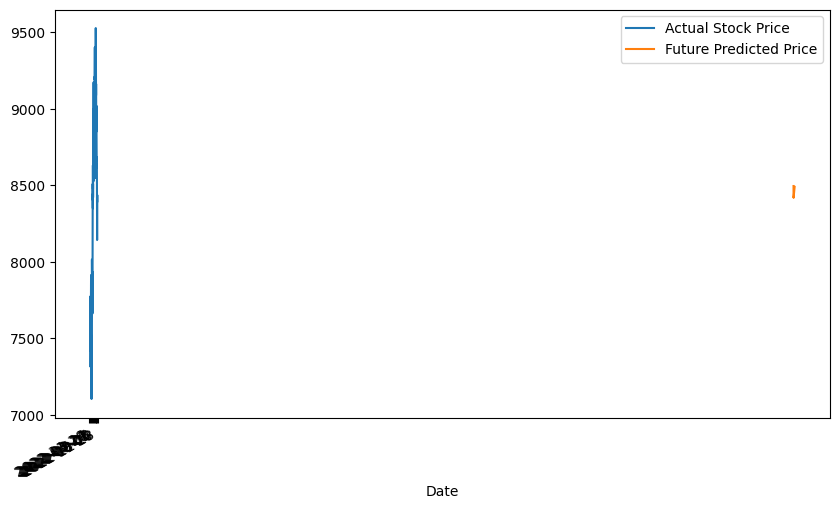

In [454]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)